In [87]:
from logger import Logger

import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error
import seaborn as sns
import statsmodels.formula.api as smf

In [2]:
logger = Logger(show = True, html_output = True, config_file = "config.txt")

2019.05.27-11:10:48 Initialize the logger
2019.05.27-11:10:48 Create logs folder logs
2019.05.27-11:10:48 Create log file logs/2019-05-27_11_10_48_log0.html
2019.05.27-11:10:48 Create models folder models
2019.05.27-11:10:48 Create output folder output
2019.05.27-11:10:48 Create data folder data
2019.05.27-11:10:48 Read config file config.txt


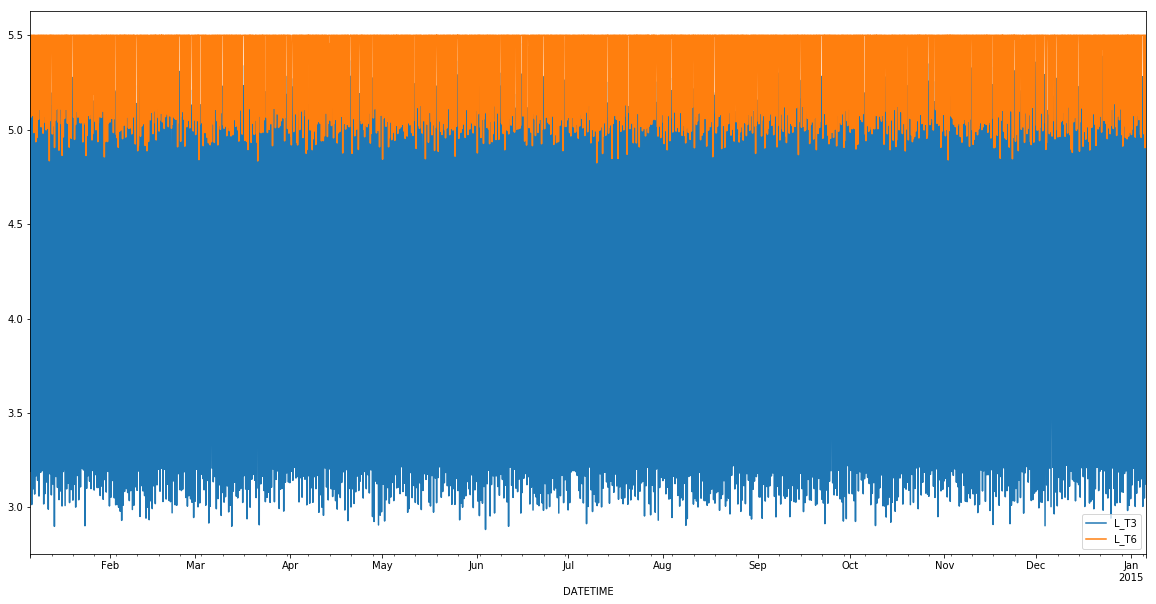

In [3]:
dateparse = lambda x: pd.datetime.strptime(x, '%d/%m/%y %H')
train_filename = logger.config_dict['TRAIN_FILE']
df_train = pd.read_csv(logger.get_data_file(logger.config_dict['TRAIN_FILE']), 
                       parse_dates = ['DATETIME'], date_parser = dateparse, index_col = 'DATETIME')
df_train.sort_index(inplace = True)
df_train[['L_T3', 'L_T6']].plot(figsize = (20, 10))

In [4]:
df_train_days = df_train.groupby(pd.Grouper(freq='D')).mean()

df_train_days = df_train.groupby(pd.Grouper(freq='D')).mean()

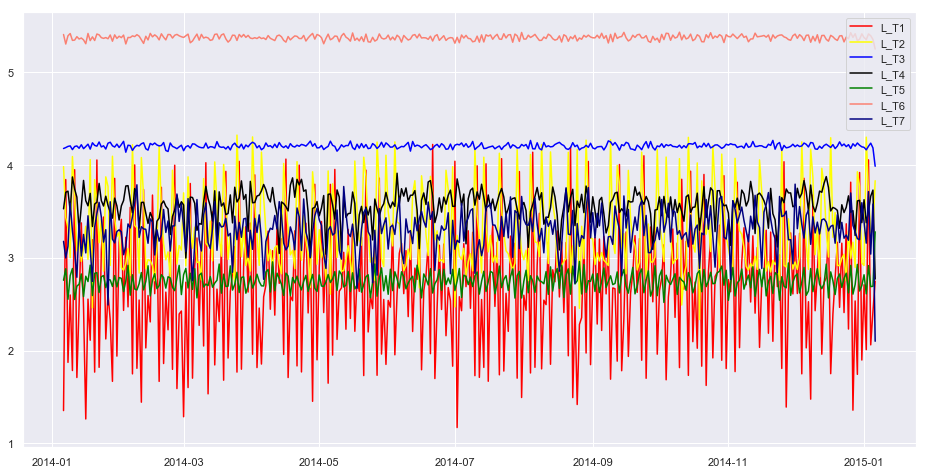

In [5]:
sns.set()
plt.figure(figsize=(16,8))
plt.plot(df_train_days.index, df_train_days.L_T1, color = 'red')
plt.plot(df_train_days.index, df_train_days.L_T2, color = 'yellow')
plt.plot(df_train_days.index, df_train_days.L_T3, color = 'blue')
plt.plot(df_train_days.index, df_train_days.L_T4, color = 'black')
plt.plot(df_train_days.index, df_train_days.L_T5, color = 'green')
plt.plot(df_train_days.index, df_train_days.L_T6, color = 'salmon')
plt.plot(df_train_days.index, df_train_days.L_T7, color = 'navy')
plt.legend(['L_T' + str(i) for i in range(1, 8)], loc = 'upper right')
plt.show()

In [6]:
df_train_days.shape

(366, 44)

In [7]:
df = pd.read_csv(logger.get_data_file(logger.config_dict['TRAIN_FILE']))

In [8]:
dateparse = lambda x: pd.datetime.strptime(x, '%d/%m/%y %H')

pd.read_csv(logger.get_data_file(logger.config_dict['TRAIN_FILE']), 
                       parse_dates = ['DATETIME'], date_parser=dateparse, index_col = 'DATETIME').sort_index()

,L_T1,L_T2,L_T3,L_T4,L_T5,L_T6,L_T7,F_PU1,S_PU1,F_PU2,...,P_J256,P_J289,P_J415,P_J302,P_J306,P_J307,P_J317,P_J14,P_J422,ATT_FLAG
DATETIME,,,,,,,,,,,,,,,,,,,,,
2014-01-06 00:00:00,0.509730,2.049003,3.191145,2.792634,2.656091,5.316831,1.562321,98.998444,1,99.018150,...,87.605774,26.495605,84.206619,18.901676,81.983734,18.791777,67.125603,29.387470,28.487471,0
2014-01-06 01:00:00,0.412580,2.009072,3.642565,2.831673,3.126387,5.494855,1.852043,99.095901,1,99.115639,...,89.448341,26.487326,85.900085,18.849329,82.150589,18.739643,67.178696,29.354256,28.454256,0
2014-01-06 02:00:00,0.320112,1.986093,4.140192,3.256733,3.574601,5.500000,2.246126,98.420959,1,98.440498,...,91.056114,26.487364,86.582474,19.597170,83.988579,19.496712,72.425293,29.354538,28.454538,0
2014-01-06 03:00:00,0.332879,2.009203,4.673478,3.744497,3.952379,5.500000,3.203573,97.575172,1,97.594460,...,92.594353,26.575815,88.020546,26.028486,64.670486,25.922703,76.275040,29.449951,28.549952,0
2014-01-06 04:00:00,0.483496,2.089049,5.237937,4.409456,3.504676,5.500000,4.439714,97.351059,1,97.370277,...,94.473099,26.723457,90.422462,26.209970,64.746620,26.104692,76.703529,29.574265,28.674263,0
2014-01-06 05:00:00,0.791114,2.773177,5.155802,3.937262,3.191528,5.322743,3.988906,94.135468,1,94.153748,...,76.848953,31.443146,67.832695,30.366247,64.369881,30.366247,60.329407,33.749393,32.849392,0
2014-01-06 06:00:00,1.186589,3.536068,4.983953,3.018011,2.859591,5.066728,2.977463,95.258003,1,95.276611,...,75.703812,29.219223,87.435600,30.004425,63.333805,30.004425,58.606335,31.808870,30.908869,0
2014-01-06 07:00:00,1.420449,3.872926,4.747458,3.581882,2.359944,5.152646,2.953742,96.947456,1,96.966560,...,73.617569,29.160114,86.829086,26.536455,62.231846,26.414701,68.808609,31.700340,30.800341,0
2014-01-06 08:00:00,1.534827,4.138434,4.417932,3.959265,1.748313,5.395835,3.228596,96.970291,1,96.989403,...,74.182251,29.420120,89.644714,26.605623,60.656143,26.484545,69.221718,31.939442,31.039440,0


In [9]:
df.head()

,DATETIME,L_T1,L_T2,L_T3,L_T4,L_T5,L_T6,L_T7,F_PU1,S_PU1,...,P_J256,P_J289,P_J415,P_J302,P_J306,P_J307,P_J317,P_J14,P_J422,ATT_FLAG
0,06/01/14 00,0.509730,2.049003,3.191145,2.792634,2.656091,5.316831,1.562321,98.998444,1,...,87.605774,26.495605,84.206619,18.901676,81.983734,18.791777,67.125603,29.387470,28.487471,0
1,06/01/14 01,0.412580,2.009072,3.642565,2.831673,3.126387,5.494855,1.852043,99.095901,1,...,89.448341,26.487326,85.900085,18.849329,82.150589,18.739643,67.178696,29.354256,28.454256,0
2,06/01/14 02,0.320112,1.986093,4.140192,3.256733,3.574601,5.500000,2.246126,98.420959,1,...,91.056114,26.487364,86.582474,19.597170,83.988579,19.496712,72.425293,29.354538,28.454538,0
3,06/01/14 03,0.332879,2.009203,4.673478,3.744497,3.952379,5.500000,3.203573,97.575172,1,...,92.594353,26.575815,88.020546,26.028486,64.670486,25.922703,76.275040,29.449951,28.549952,0
4,06/01/14 04,0.483496,2.089049,5.237937,4.409456,3.504676,5.500000,4.439714,97.351059,1,...,94.473099,26.723457,90.422462,26.209970,64.746620,26.104692,76.703529,29.574265,28.674263,0


In [10]:
df1 = pd.read_csv(logger.get_data_file(logger.config_dict['TRAIN_FILE']), 
                       parse_dates = ['DATETIME'], date_parser = dateparse, index_col = 'DATETIME')

In [11]:
df1.head()

,L_T1,L_T2,L_T3,L_T4,L_T5,L_T6,L_T7,F_PU1,S_PU1,F_PU2,...,P_J256,P_J289,P_J415,P_J302,P_J306,P_J307,P_J317,P_J14,P_J422,ATT_FLAG
DATETIME,,,,,,,,,,,,,,,,,,,,,
2014-01-06 00:00:00,0.509730,2.049003,3.191145,2.792634,2.656091,5.316831,1.562321,98.998444,1,99.018150,...,87.605774,26.495605,84.206619,18.901676,81.983734,18.791777,67.125603,29.387470,28.487471,0
2014-01-06 01:00:00,0.412580,2.009072,3.642565,2.831673,3.126387,5.494855,1.852043,99.095901,1,99.115639,...,89.448341,26.487326,85.900085,18.849329,82.150589,18.739643,67.178696,29.354256,28.454256,0
2014-01-06 02:00:00,0.320112,1.986093,4.140192,3.256733,3.574601,5.500000,2.246126,98.420959,1,98.440498,...,91.056114,26.487364,86.582474,19.597170,83.988579,19.496712,72.425293,29.354538,28.454538,0
2014-01-06 03:00:00,0.332879,2.009203,4.673478,3.744497,3.952379,5.500000,3.203573,97.575172,1,97.594460,...,92.594353,26.575815,88.020546,26.028486,64.670486,25.922703,76.275040,29.449951,28.549952,0
2014-01-06 04:00:00,0.483496,2.089049,5.237937,4.409456,3.504676,5.500000,4.439714,97.351059,1,97.370277,...,94.473099,26.723457,90.422462,26.209970,64.746620,26.104692,76.703529,29.574265,28.674263,0


In [12]:
df1

,L_T1,L_T2,L_T3,L_T4,L_T5,L_T6,L_T7,F_PU1,S_PU1,F_PU2,...,P_J256,P_J289,P_J415,P_J302,P_J306,P_J307,P_J317,P_J14,P_J422,ATT_FLAG
DATETIME,,,,,,,,,,,,,,,,,,,,,
2014-01-06 00:00:00,0.509730,2.049003,3.191145,2.792634,2.656091,5.316831,1.562321,98.998444,1,99.018150,...,87.605774,26.495605,84.206619,18.901676,81.983734,18.791777,67.125603,29.387470,28.487471,0
2014-01-06 01:00:00,0.412580,2.009072,3.642565,2.831673,3.126387,5.494855,1.852043,99.095901,1,99.115639,...,89.448341,26.487326,85.900085,18.849329,82.150589,18.739643,67.178696,29.354256,28.454256,0
2014-01-06 02:00:00,0.320112,1.986093,4.140192,3.256733,3.574601,5.500000,2.246126,98.420959,1,98.440498,...,91.056114,26.487364,86.582474,19.597170,83.988579,19.496712,72.425293,29.354538,28.454538,0
2014-01-06 03:00:00,0.332879,2.009203,4.673478,3.744497,3.952379,5.500000,3.203573,97.575172,1,97.594460,...,92.594353,26.575815,88.020546,26.028486,64.670486,25.922703,76.275040,29.449951,28.549952,0
2014-01-06 04:00:00,0.483496,2.089049,5.237937,4.409456,3.504676,5.500000,4.439714,97.351059,1,97.370277,...,94.473099,26.723457,90.422462,26.209970,64.746620,26.104692,76.703529,29.574265,28.674263,0
2014-01-06 05:00:00,0.791114,2.773177,5.155802,3.937262,3.191528,5.322743,3.988906,94.135468,1,94.153748,...,76.848953,31.443146,67.832695,30.366247,64.369881,30.366247,60.329407,33.749393,32.849392,0
2014-01-06 06:00:00,1.186589,3.536068,4.983953,3.018011,2.859591,5.066728,2.977463,95.258003,1,95.276611,...,75.703812,29.219223,87.435600,30.004425,63.333805,30.004425,58.606335,31.808870,30.908869,0
2014-01-06 07:00:00,1.420449,3.872926,4.747458,3.581882,2.359944,5.152646,2.953742,96.947456,1,96.966560,...,73.617569,29.160114,86.829086,26.536455,62.231846,26.414701,68.808609,31.700340,30.800341,0
2014-01-06 08:00:00,1.534827,4.138434,4.417932,3.959265,1.748313,5.395835,3.228596,96.970291,1,96.989403,...,74.182251,29.420120,89.644714,26.605623,60.656143,26.484545,69.221718,31.939442,31.039440,0


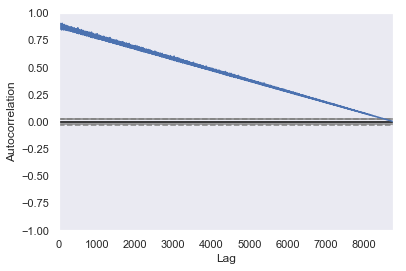

In [13]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(df1)

In [14]:
df2 = df1['L_T1']

df2.head()

DATETIME
2014-01-06 00:00:00    0.509730
2014-01-06 01:00:00    0.412580
2014-01-06 02:00:00    0.320112
2014-01-06 03:00:00    0.332879
2014-01-06 04:00:00    0.483496
Name: L_T1, dtype: float64

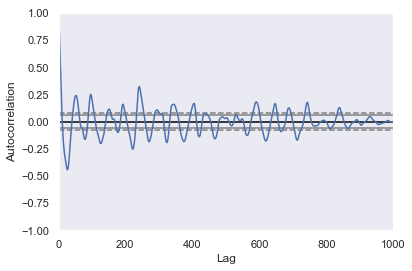

In [15]:
autocorrelation_plot(df2[0:1000])

In [16]:
dateparse('04/01/17 00') - dateparse('04/01/17 00')

datetime.timedelta(0)

In [17]:
df2.head()

DATETIME
2014-01-06 00:00:00    0.509730
2014-01-06 01:00:00    0.412580
2014-01-06 02:00:00    0.320112
2014-01-06 03:00:00    0.332879
2014-01-06 04:00:00    0.483496
Name: L_T1, dtype: float64

In [18]:
df2[0:790]

DATETIME
2014-01-06 00:00:00    0.509730
2014-01-06 01:00:00    0.412580
2014-01-06 02:00:00    0.320112
2014-01-06 03:00:00    0.332879
2014-01-06 04:00:00    0.483496
2014-01-06 05:00:00    0.791114
2014-01-06 06:00:00    1.186589
2014-01-06 07:00:00    1.420449
2014-01-06 08:00:00    1.534827
2014-01-06 09:00:00    1.576541
2014-01-06 10:00:00    1.558550
2014-01-06 11:00:00    1.480654
2014-01-06 12:00:00    1.464823
2014-01-06 13:00:00    1.483956
2014-01-06 14:00:00    1.383691
2014-01-06 15:00:00    1.351578
2014-01-06 16:00:00    1.454622
2014-01-06 17:00:00    1.531665
2014-01-06 18:00:00    1.662596
2014-01-06 19:00:00    1.839003
2014-01-06 20:00:00    1.904378
2014-01-06 21:00:00    2.113526
2014-01-06 22:00:00    2.286262
2014-01-06 23:00:00    2.416871
2014-01-07 00:00:00    2.607121
2014-01-07 01:00:00    2.877933
2014-01-07 02:00:00    3.235788
2014-01-07 03:00:00    3.537876
2014-01-07 04:00:00    3.711315
2014-01-07 05:00:00    3.970422
                         ...   

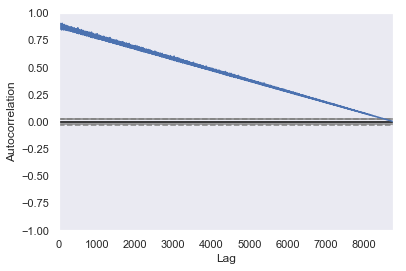

In [19]:
autocorrelation_plot(df1)

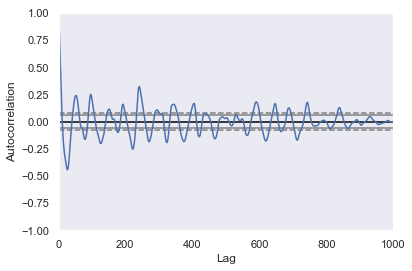

In [75]:
autocorrelation_plot(df1['L_T1'][0:1000])

In [24]:
from statsmodels.tsa.arima_model import ARIMA


ValueError: d > 2 is not supported

In [26]:
df3 = df1['L_T1']

ValueError: d > 2 is not supported

In [96]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels as sm

<Figure size 432x288 with 0 Axes>

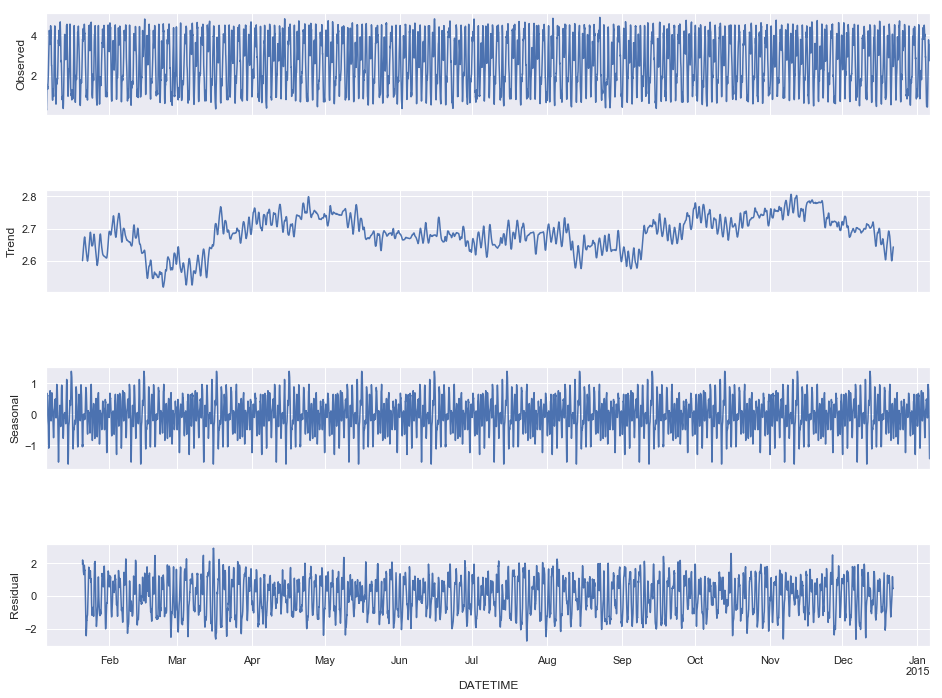

In [138]:
result = seasonal_decompose(df1['L_T1'], model='additive', freq=24 * 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(15, 12)

In [ ]:
# result = seasonal_decompose(df1[['L_T1', 'L_T2', 'L_T3', 'L_T4', 'L_T5']], model='additive', freq=365)
result = seasonal_decompose(df1[['L_T1']], model='additive', freq=24)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(15, 12)

In [48]:
arima_mod6 = ARIMA(df3, (6,1,0)).fit(disp=False)

/usr/local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)
/usr/local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


In [52]:
def parser(x):
	return pd.datetime.strptime(x, '%d/%m/%y %H')


series = pd.read_csv(logger.get_data_file(logger.config_dict['TRAIN_FILE']), header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)

In [53]:
series.head()

,L_T1,L_T2,L_T3,L_T4,L_T5,L_T6,L_T7,F_PU1,S_PU1,F_PU2,...,P_J256,P_J289,P_J415,P_J302,P_J306,P_J307,P_J317,P_J14,P_J422,ATT_FLAG
DATETIME,,,,,,,,,,,,,,,,,,,,,
2014-01-06 00:00:00,0.509730,2.049003,3.191145,2.792634,2.656091,5.316831,1.562321,98.998444,1,99.018150,...,87.605774,26.495605,84.206619,18.901676,81.983734,18.791777,67.125603,29.387470,28.487471,0
2014-01-06 01:00:00,0.412580,2.009072,3.642565,2.831673,3.126387,5.494855,1.852043,99.095901,1,99.115639,...,89.448341,26.487326,85.900085,18.849329,82.150589,18.739643,67.178696,29.354256,28.454256,0
2014-01-06 02:00:00,0.320112,1.986093,4.140192,3.256733,3.574601,5.500000,2.246126,98.420959,1,98.440498,...,91.056114,26.487364,86.582474,19.597170,83.988579,19.496712,72.425293,29.354538,28.454538,0
2014-01-06 03:00:00,0.332879,2.009203,4.673478,3.744497,3.952379,5.500000,3.203573,97.575172,1,97.594460,...,92.594353,26.575815,88.020546,26.028486,64.670486,25.922703,76.275040,29.449951,28.549952,0
2014-01-06 04:00:00,0.483496,2.089049,5.237937,4.409456,3.504676,5.500000,4.439714,97.351059,1,97.370277,...,94.473099,26.723457,90.422462,26.209970,64.746620,26.104692,76.703529,29.574265,28.674263,0


In [60]:
# model = ARIMA(series['L_T1'], order=(1000,1,0))

/usr/local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)
/usr/local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


In [56]:
model_fit = model.fit(disp=0)

                             ARIMA Model Results                              
Dep. Variable:                 D.L_T1   No. Observations:                 8760
Model:                 ARIMA(5, 1, 0)   Log Likelihood                6299.329
Method:                       css-mle   S.D. of innovations              0.118
Date:                Mon, 27 May 2019   AIC                         -12584.658
Time:                        11:35:16   BIC                         -12535.112
Sample:                    01-06-2014   HQIC                        -12567.776
                         - 01-06-2015                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0002      0.006      0.029      0.977      -0.011       0.012
ar.L1.D.L_T1     1.0627      0.011     99.919      0.000       1.042       1.084
ar.L2.D.L_T1    -0.2637      0.016    -16.95

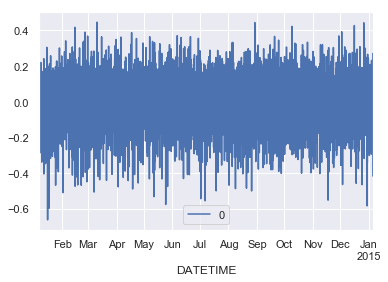

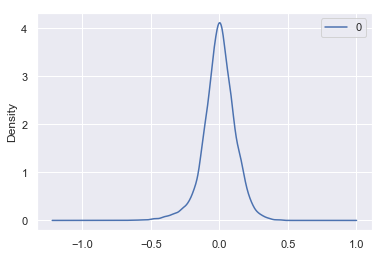

                 0
count  8760.000000
mean      0.000007
std       0.117886
min      -0.663510
25%      -0.063298
50%       0.002878
75%       0.071642
max       0.446463


In [59]:
print(model_fit.summary())
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

In [63]:
X = series['L_T1'].values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

predicted=3.068826, expected=2.963586
predicted=2.801616, expected=2.777642
predicted=2.637397, expected=2.637768
predicted=2.534136, expected=2.659478
predicted=2.712568, expected=2.856048
predicted=3.062508, expected=3.067917
predicted=3.254459, expected=3.230050
predicted=3.369993, expected=3.298359
predicted=3.342847, expected=3.388332
predicted=3.462599, expected=3.709146
predicted=4.014621, expected=4.011989
predicted=4.238973, expected=4.295232
predicted=4.529028, expected=4.485759
predicted=4.629787, expected=4.499132
predicted=4.456984, expected=4.450658
predicted=4.386581, expected=4.365535
predicted=4.268236, expected=4.195485
predicted=4.017913, expected=3.826923
predicted=3.473900, expected=3.364974
predicted=2.966274, expected=2.956939
predicted=2.630391, expected=2.728204
predicted=2.574590, expected=2.451453
predicted=2.216956, expected=2.153346
predicted=1.929776, expected=1.828430
predicted=1.579369, expected=1.399589
predicted=1.027926, expected=0.956891
predicted=0.

predicted=3.294128, expected=3.274453
predicted=3.397369, expected=3.381081
predicted=3.436536, expected=3.631593
predicted=3.874042, expected=3.705223
predicted=3.705606, expected=3.694428
predicted=3.663381, expected=3.817946
predicted=3.953773, expected=4.071455
predicted=4.285538, expected=4.071957
predicted=4.003385, expected=3.989264
predicted=3.921326, expected=3.940656
predicted=3.906967, expected=4.058153
predicted=4.167770, expected=4.168915
predicted=4.249322, expected=4.114786
predicted=4.040517, expected=4.089660
predicted=4.092662, expected=3.979074
predicted=3.856919, expected=3.850473
predicted=3.730572, expected=3.737263
predicted=3.649706, expected=3.644143
predicted=3.567553, expected=3.574882
predicted=3.526685, expected=3.792921
predicted=4.047522, expected=4.282373
predicted=4.747751, expected=4.571527
predicted=4.765196, expected=4.579939
predicted=4.552319, expected=4.455320
predicted=4.331373, expected=4.234259
predicted=3.995716, expected=4.009358
predicted=3.

/usr/local/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=1.779840, expected=1.908033
predicted=1.957156, expected=1.968484
predicted=2.023193, expected=1.951566
predicted=1.917161, expected=1.904291
predicted=1.869662, expected=2.011172
predicted=2.134575, expected=2.319762
predicted=2.609795, expected=2.686967
predicted=2.999968, expected=2.948859
predicted=3.153300, expected=3.267189
predicted=3.555411, expected=3.562729
predicted=3.787481, expected=3.733864
predicted=3.827228, expected=3.904972
predicted=4.042650, expected=4.116327
predicted=4.283304, expected=3.902329
predicted=3.604271, expected=3.841928
predicted=3.837654, expected=3.951072
predicted=4.060284, expected=4.219973
predicted=4.446226, expected=4.459809
predicted=4.666621, expected=4.336561
predicted=4.165185, expected=4.050356
predicted=3.791868, expected=3.629174
predicted=3.233787, expected=3.228866
predicted=2.875107, expected=2.842905
predicted=2.519944, expected=2.435312
predicted=2.098021, expected=2.020438
predicted=1.695415, expected=1.657674
predicted=1.

predicted=3.894081, expected=3.939697
predicted=4.053512, expected=4.204170
predicted=4.438549, expected=4.072440
predicted=3.857335, expected=3.986084
predicted=3.934692, expected=3.890373
predicted=3.796045, expected=3.911474
predicted=3.927629, expected=3.769642
predicted=3.617081, expected=3.584521
predicted=3.432711, expected=3.399668
predicted=3.254827, expected=3.250136
predicted=3.124984, expected=3.179941
predicted=3.143186, expected=3.163039
predicted=3.167290, expected=3.196973
predicted=3.246298, expected=3.127308
predicted=3.054596, expected=3.071717
predicted=3.039517, expected=3.180133
predicted=3.309291, expected=3.385228
predicted=3.565640, expected=3.814460
predicted=4.226342, expected=4.250696
predicted=4.617712, expected=4.603757
predicted=4.880991, expected=4.718374
predicted=4.762459, expected=4.725277
predicted=4.695017, expected=4.566411
predicted=4.372480, expected=4.426770
predicted=4.293286, expected=4.269764
predicted=4.121708, expected=4.167480
predicted=4.

predicted=2.382035, expected=2.391979
predicted=2.160786, expected=2.121483
predicted=1.920237, expected=1.843867
predicted=1.626827, expected=1.506814
predicted=1.234881, expected=1.154690
predicted=0.876836, expected=0.949291
predicted=0.824333, expected=0.850892
predicted=0.797730, expected=0.757504
predicted=0.693558, expected=0.687727
predicted=0.659307, expected=0.592842
predicted=0.521186, expected=0.549371
predicted=0.531341, expected=0.519679
predicted=0.500949, expected=0.581475
predicted=0.656674, expected=0.738472
predicted=0.894568, expected=0.998525
predicted=1.239374, expected=1.316011
predicted=1.596604, expected=1.605910
predicted=1.841609, expected=1.733941
predicted=1.802116, expected=1.973131
predicted=2.195355, expected=2.361784
predicted=2.697627, expected=2.654230
predicted=2.850383, expected=2.951896
predicted=3.206688, expected=3.295841
predicted=3.587256, expected=3.648165
predicted=3.919872, expected=4.014721
predicted=4.310889, expected=4.239745
predicted=4.

predicted=1.685816, expected=1.654588
predicted=1.580603, expected=1.622334
predicted=1.612706, expected=1.712223
predicted=1.816100, expected=1.793608
predicted=1.856556, expected=1.971435
predicted=2.150065, expected=2.047607
predicted=2.090579, expected=2.042407
predicted=2.019694, expected=2.236272
predicted=2.446804, expected=2.412826
predicted=2.534261, expected=2.586636
predicted=2.726834, expected=2.787711
predicted=2.970802, expected=3.024898
predicted=3.220148, expected=3.286357
predicted=3.500588, expected=3.694717
predicted=4.062109, expected=3.962858
predicted=4.140587, expected=4.043692
predicted=4.064876, expected=4.256598
predicted=4.464992, expected=4.481640
predicted=4.639222, expected=4.383933
predicted=4.207671, expected=4.213723
predicted=4.070338, expected=4.018258
predicted=3.838797, expected=3.851394
predicted=3.694052, expected=3.696854
predicted=3.570834, expected=3.672400
predicted=3.689120, expected=3.741616
predicted=3.826628, expected=3.790359
predicted=3.

predicted=3.794619, expected=3.873733
predicted=4.054478, expected=4.147149
predicted=4.375281, expected=4.114168
predicted=4.007112, expected=4.100977
predicted=4.096755, expected=4.040492
predicted=3.965390, expected=3.997655
predicted=3.941189, expected=3.932154
predicted=3.873617, expected=3.751432
predicted=3.573851, expected=3.623159
predicted=3.536315, expected=3.461061
predicted=3.315724, expected=3.317848
predicted=3.202658, expected=3.189076
predicted=3.094921, expected=3.075511
predicted=2.988584, expected=3.094533
predicted=3.149130, expected=3.182659
predicted=3.274554, expected=3.419830
predicted=3.657710, expected=3.754481
predicted=4.062545, expected=4.298759
predicted=4.801404, expected=4.585879
predicted=4.761818, expected=4.580698
predicted=4.514844, expected=4.476526
predicted=4.368999, expected=4.326277
predicted=4.153194, expected=4.208506
predicted=4.091575, expected=4.039419
predicted=3.880613, expected=3.978609
predicted=3.958252, expected=3.810159
predicted=3.

predicted=4.383362, expected=4.451644
predicted=4.588006, expected=4.430664
predicted=4.348626, expected=3.970639
predicted=3.487170, expected=3.671266
predicted=3.464901, expected=3.459381
predicted=3.273112, expected=3.134709
predicted=2.817893, expected=2.937066
predicted=2.836073, expected=2.524081
predicted=2.142140, expected=2.081356
predicted=1.720218, expected=1.662770


KeyboardInterrupt: 

/usr/local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)


                              ARMA Model Results                              
Dep. Variable:                   L_T1   No. Observations:                 8761
Model:                     ARMA(2, 0)   Log Likelihood                6523.162
Method:                       css-mle   S.D. of innovations              0.115
Date:                Mon, 27 May 2019   AIC                         -13038.324
Time:                        11:51:04   BIC                         -13010.011
Sample:                    01-06-2014   HQIC                        -13028.677
                         - 01-06-2015                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.6760      0.034     78.181      0.000       2.609       2.743
ar.L1.L_T1     1.8357      0.005    350.633      0.000       1.825       1.846
ar.L2.L_T1    -0.8715      0.005   -166.440      0.0

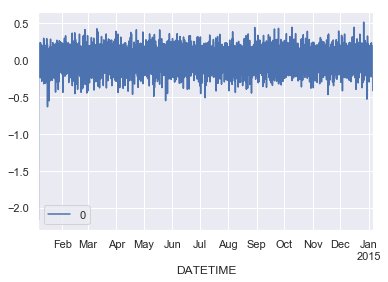

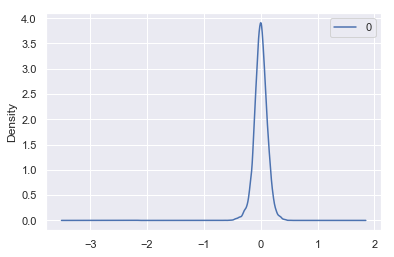

                 0
count  8761.000000
mean     -0.000198
std       0.117182
min      -2.166315
25%      -0.067844
50%       0.000519
75%       0.070028
max       0.510192


In [76]:
model = ARIMA(series['L_T1'], order=(2,0,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

In [ ]:
X = series['L_T1'].values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
c = 0
for c, t in enumerate(range(len(test))):
	model = ARIMA(history, order=(2,0,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	if (c % 1000 == 0): 
        print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

In [91]:
results = smf.ols('L_T1 ~ L_T1', data=series).fit()

In [92]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   L_T1   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.410e+34
Date:                Mon, 27 May 2019   Prob (F-statistic):               0.00
Time:                        12:04:59   Log-Likelihood:             2.9450e+05
No. Observations:                8761   AIC:                        -5.890e+05
Df Residuals:                    8759   BIC:                        -5.890e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5.998e-16   1.59e-17    -37.741      0.0

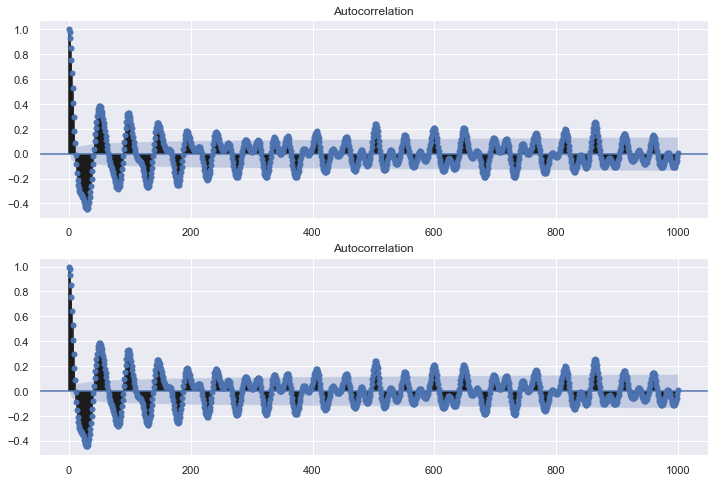

In [98]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(series['L_T1'].values.squeeze(), lags=1000, ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_acf(series['L_T1'].values.squeeze(), lags=1000, ax=ax2)

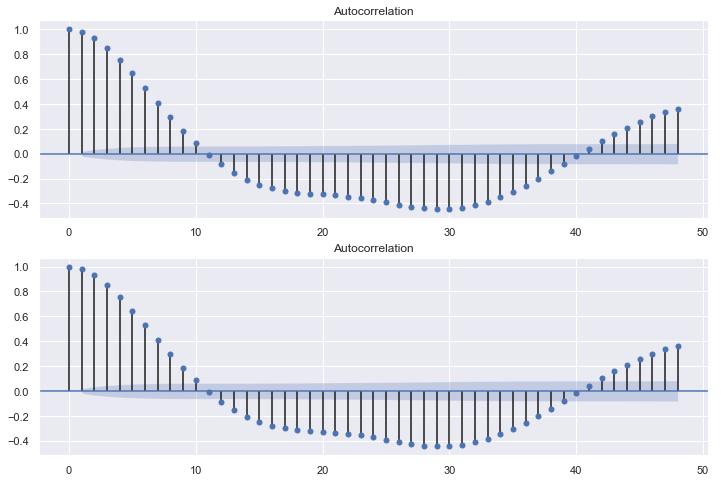

In [105]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(series['L_T1'].values.squeeze(), lags=48, ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_acf(series['L_T1'].values.squeeze(), lags=48, ax=ax2)

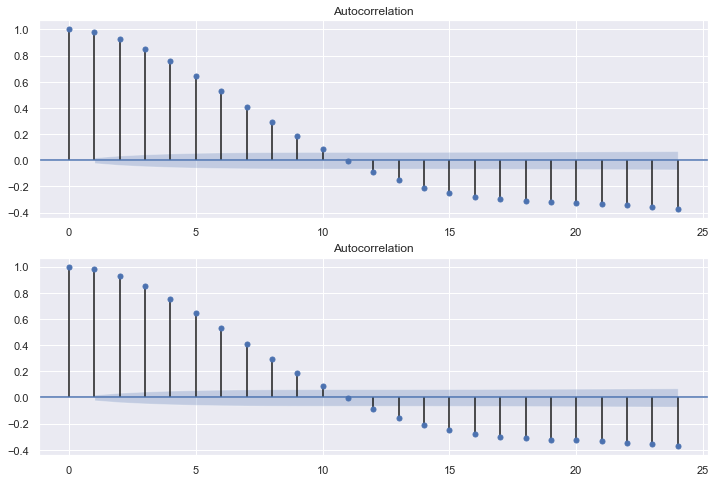

In [104]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(series['L_T1'].values.squeeze(), lags=24, ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_acf(series['L_T1'].values.squeeze(), lags=24, ax=ax2)

In [106]:
# data is seasonal => d is 0

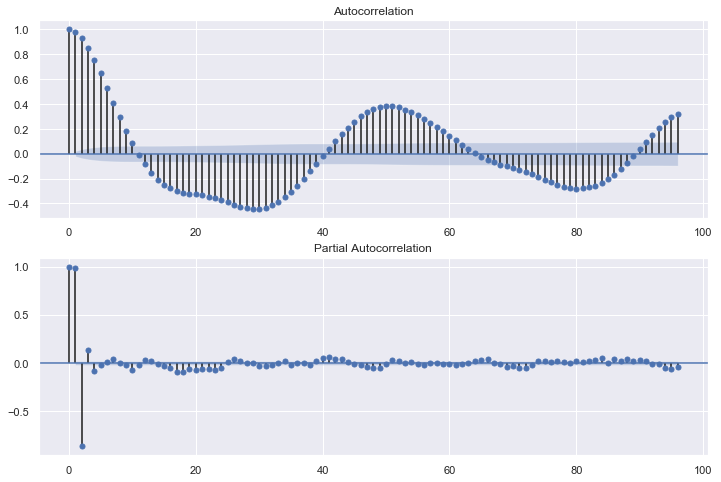

In [139]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(series['L_T1'].values.squeeze(), lags=96, ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(series['L_T1'].values.squeeze(), lags=96, ax=ax2)

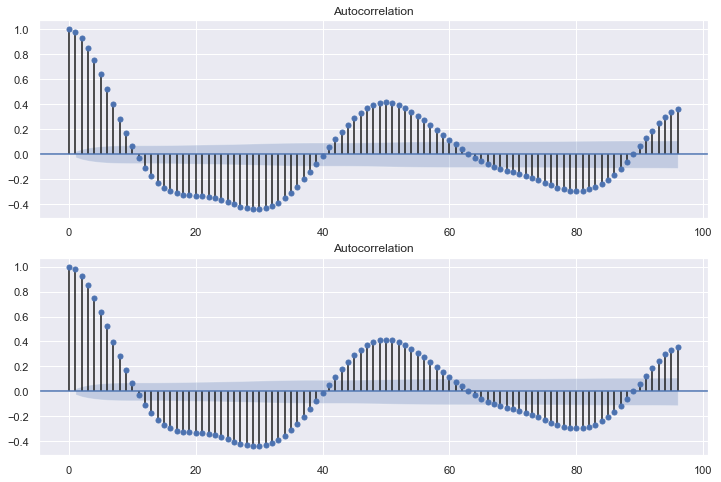

In [111]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(series['L_T1'][2000:].values.squeeze(), lags=96, ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_acf(series['L_T1'][2000:].values.squeeze(), lags=96, ax=ax2)

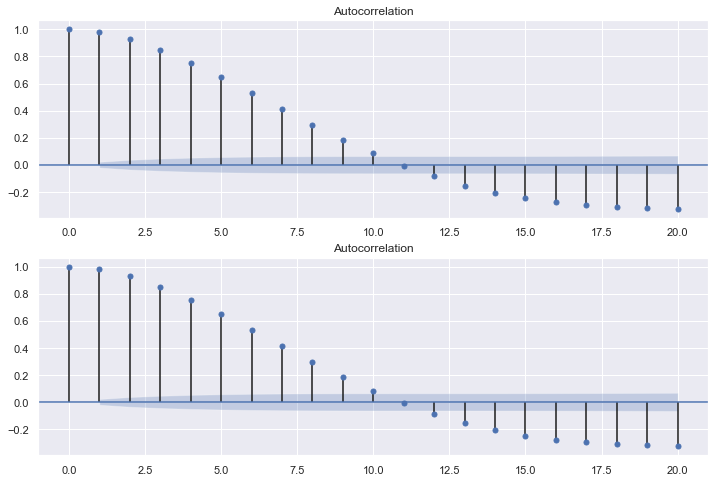

In [113]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(series['L_T1'].values.squeeze(), lags=20, ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_acf(series['L_T1'].values.squeeze(), lags=20, ax=ax2)

In [143]:
import arma

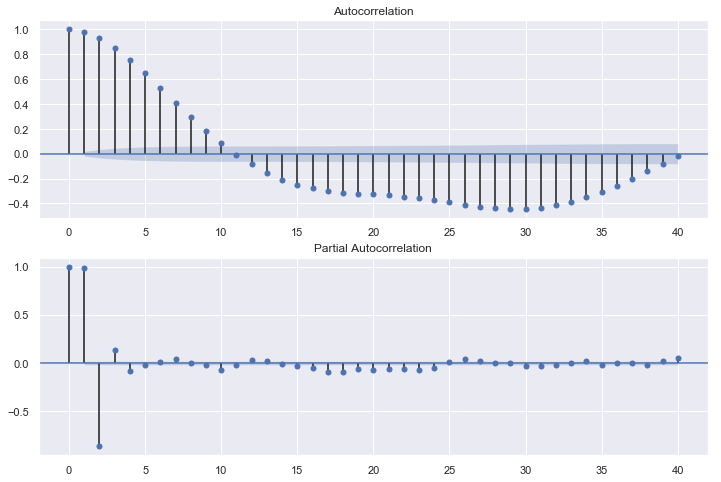

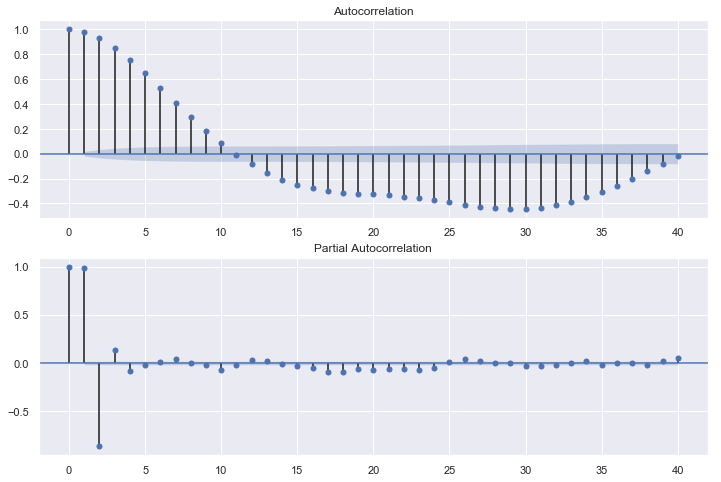

In [144]:
arma.plot_autocorrelations(df1['L_T1'])

In [145]:
arma.create_arma_model(df['F_T1'], 2, 0)

AttributeError: module 'arma' has no attribute 'create_arma_model'